In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import drive

In [ ]:
df1 = pd.read_excel('Reddit_Combi.xlsx')
df2 = pd.read_excel('Twitter_Non-Advert (1).xlsx')

In [ ]:
df1 = df1.drop(['title'],axis=1)

In [ ]:
df1 = df1.drop(['body'],axis=1)

In [ ]:
df1 = df1.rename(columns={"Body_Title": "text"})

In [ ]:
df2 = df2.sort_values(by='label')

In [ ]:
df2.value_counts(['label'])

label
1        1268
0         783
dtype: int64

In [ ]:
df2 = df2.iloc[:783,:]

In [ ]:
frames = [df1, df2]
df = pd.concat(frames)

In [ ]:
# df = pd.read_csv('emotion_dataset.csv')

In [ ]:
# df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
# df=df.rename(columns={'Text':'text'})

In [ ]:
df.head()

,text,label
0,Envy to other is swallowing me Im from develop...,1
1,Nothin outta the ordinary. Paradise. Job stres...,1
2,Almost 49 and the chasm of emptiness has never...,1
3,I’m happy again After my closest friend left m...,0
4,Is it possible to recover from such a traumati...,1


# **Data Preprocessing**

```
*   removing Hashtag, Mention, URLs
*   text lowercase
*   stemming
*   lemmatizing
*   removing Punctuations
*   removing stopwords
*   sub of emojis
```














In [ ]:
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.8 MB/s eta 0:00:00


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import demoji
import string

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
stopwords.words('english')
print (stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
STOPWORDS = set(stopwords.words('english'))

stemmer = SnowballStemmer('english')
lemmatizer=WordNetLemmatizer()


def clean_text(text):

    #removing Hashtag, Mention, URLs
    pattern = re.compile(r"(#[A-Za-z0-9]+|@[A-Za-z0-9]+|https?://\S+|www\.\S+|\S+\.[a-z]+|RT @)")
    text = pattern.sub('', text)
    text = " ".join(text.split())

    #make all text lowercase
    text = text.lower()

    #stemming
    text = " ".join([stemmer.stem(word) for word in text.split()])

    #lemmatizing
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])

    #removing Punctuations
    remove_punc = re.compile(r"[%s]" % re.escape(string.punctuation))
    text = remove_punc.sub('', text)

    #removing stopwords
    text = " ".join([word for word in str(text).split() if word not in STOPWORDS])

    # sub of emojis
    emoji = demoji.findall(text)
    for emot in emoji:
        text = re.sub(r"(%s)" % (emot), "_".join(emoji[emot].split()), text)

    return text

In [ ]:
df['cleaned_text'] = df['text'].apply(lambda text: clean_text(text))

In [ ]:
df.head(30)

,text,label,cleaned_text
0,Envy to other is swallowing me Im from develop...,1,envi swallow im developingcountry indonesia te...
1,Nothin outta the ordinary. Paradise. Job stres...,1,nothin outta ordinary paradise job stress life...
2,Almost 49 and the chasm of emptiness has never...,1,almost 49 chasm empti ha never greater iv diag...
3,I’m happy again After my closest friend left m...,0,im happi closest friend left april final let g...
4,Is it possible to recover from such a traumati...,1,possibl recov traumat childhood onli 15 yet fe...
5,I’m finding it hard to find a reason to get up...,1,im find hard find reason get morn isnt horribl...
6,I convinced myself I was going to commit suici...,1,convinc wa go commit suicid sometim next 2 wee...
7,all i do is work and i can never catch a break...,1,work never catch break liter alway assign time...
8,Ive decided to get admitted to a hospital inst...,1,ive decid get admit hospit instead kill hi im ...
9,"I’m doing well, but not feeling well. A reflec...",1,im well feel well reflection iv lot stress lat...


# **Preprocessed Information**

In [ ]:
df.isnull()

,text,label,cleaned_text
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
421,False,False,False
406,False,False,False
385,False,False,False
444,False,False,False


In [ ]:
df['cleaned_text'].duplicated().sum()

25

In [ ]:
df.drop_duplicates("cleaned_text", inplace = True)

In [ ]:
df['label'].value_counts()

1    2744
0    1137
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

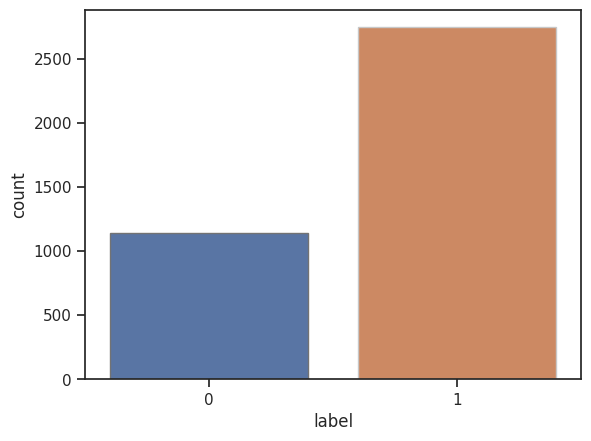

In [ ]:
sns.set_theme(style="ticks")
sns.countplot(data = df, x = 'label', edgecolor=sns.color_palette("RdGy_r", 5))

In [ ]:
features = df['cleaned_text']
labels = df['label']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tv = TfidfVectorizer(max_features = 5000)
features = list(features)
features = tv.fit_transform(features).toarray()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.svm import LinearSVC

## SVM

In [ ]:
lsvc = LinearSVC()
# training the model
lsvc.fit(features_train, labels_train)
# getting the score of train and test data
print(lsvc.score(features_train, labels_train))
print(lsvc.score(features_test, labels_test))
y_pred = lsvc.predict(features_test)
print ("Loss")

0.9967783505154639
0.9330759330759331
Loss


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.9216247672253259
0.9330759330759331
0.932304810796431
[0.89166667 0.95158287]
0.951582867783985


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.912819734345351
0.9330759330759331
0.9330759330759331
[0.856      0.96963947]
[0.856      0.96963947]


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.9323106271361576
0.9330759330759331
0.9329793645030908
[0.93043478 0.93418647]
[0.93043478 0.93418647]


## Naive Bayes (Gaussian)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(features_train, labels_train)
print(gnb.score(features_train, labels_train))
print(gnb.score(features_test, labels_test))
y_pred = gnb.predict(features_test)

0.915270618556701
0.7850707850707851


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.7480040782638249
0.7850707850707851
0.782458701705194
[0.65135699 0.84465116]
0.8446511627906977


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.7427400379506641
0.7850707850707851
0.7850707850707851
[0.624      0.86148008]
[0.624      0.86148008]


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.7548449303541263
0.7850707850707851
0.7810912054529178
[0.68122271 0.82846715]
[0.68122271 0.82846715]


## Naive Bayes (Multinomial)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnb = MultinomialNB()
mnb.fit(features_train, labels_train)
print(mnb.score(features_train, labels_train))
print(mnb.score(features_test, labels_test))
y_pred = mnb.predict(features_test)

0.9036726804123711
0.8738738738738738


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.8355747305140961
0.8738738738738738
0.8638650310758519
[0.75621891 0.91493056]
0.9149305555555556


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.804
0.8738738738738738
0.8738738738738738
[0.608 1.   ]
[0.608 1.   ]


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.9216
0.8738738738738738
0.8936504504504504
[1.     0.8432]
[1.     0.8432]


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(features_train, labels_train)
print(lr.score(features_train, labels_train))
print(lr.score(features_test, labels_test))
y_pred = lr.predict(features_test)

0.9568298969072165
0.918918918918919


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.9023575336754905
0.918918918918919
0.9166934827768332
[0.86214442 0.94257065]
0.9425706472196901


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.8845123339658445
0.918918918918919
0.918918918918919
[0.788      0.98102467]
[0.788      0.98102467]


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.929354182557844
0.918918918918919
0.921391185235579
[0.95169082 0.90701754]
[0.95169082 0.90701754]


## Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators = 10, random_state = 0)
rfc.fit(features_train, labels_train)
print(rfc.score(features_train, labels_train))
print(rfc.score(features_test, labels_test))
y_pred = lr.predict(features_test)

0.9958118556701031
0.888030888030888


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.9023575336754905
0.918918918918919
0.9166934827768332
[0.86214442 0.94257065]
0.9425706472196901


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.8845123339658445
0.918918918918919
0.918918918918919
[0.788      0.98102467]
[0.788      0.98102467]


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.929354182557844
0.918918918918919
0.921391185235579
[0.95169082 0.90701754]
[0.95169082 0.90701754]


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(features_train, labels_train)
print(clf.score(features_test, labels_test))
y_pred = clf.predict(features_test)

0.87001287001287


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.843060124588787
0.87001287001287
0.8662461819877653
[0.77802198 0.90809827]
0.9080982711555959


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.8274345351043644
0.87001287001287
0.87001287001287
[0.708      0.94686907]
[0.708      0.94686907]


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.8678961282619819
0.87001287001287
0.8694937780303633
[0.86341463 0.87237762]
[0.86341463 0.87237762]


# **TF-IDF + LOGISTIC REGRESSION (GRID SEARCH CROSS VALIDATION)**




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
X=df['cleaned_text']
Y=df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
tfidf = TfidfVectorizer(max_features = 5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

              precision    recall  f1-score   support

           0       0.94      0.86      0.89       222
           1       0.94      0.98      0.96       555

    accuracy                           0.94       777
   macro avg       0.94      0.92      0.93       777
weighted avg       0.94      0.94      0.94       777



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


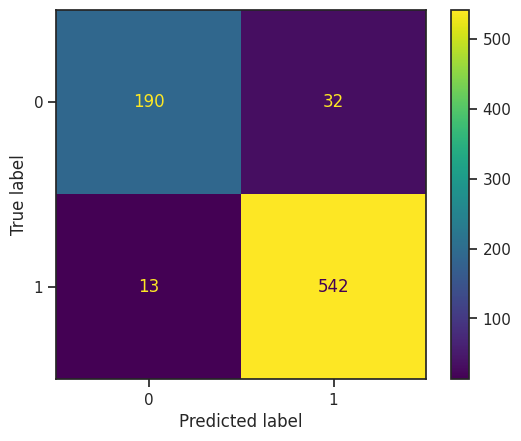

In [ ]:
# LOGISTIC REGRESSION
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
log_model = LogisticRegression(solver = 'saga')
param_grid = {'C': np.logspace(0, 10, 5)}
grid_log_model = HalvingGridSearchCV(log_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_log_model.fit(X_train_tfidf, y_train)
preds_grid_log_model = grid_log_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_log_model))
cm = confusion_matrix(y_test, preds_grid_log_model, labels=grid_log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=grid_log_model.classes_)
disp.plot()

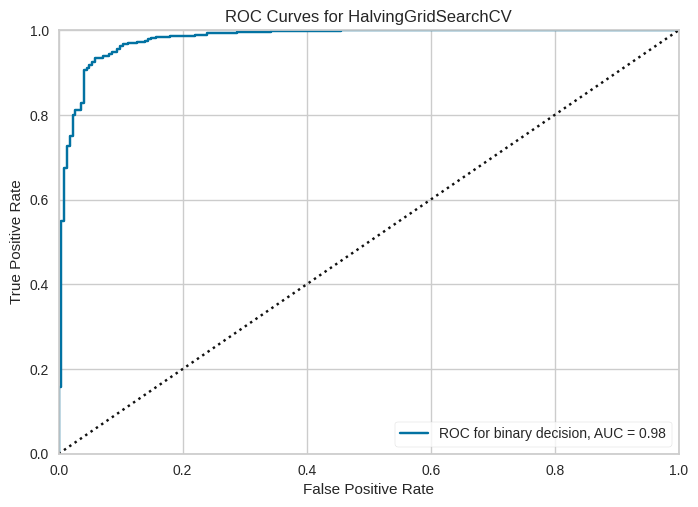

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for HalvingGridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       binary='TRUE', classes=['0', '1'],
       estimator=HalvingGridSearchCV(estimator=LogisticRegression(solver='saga'),
                                     n_jobs=-1,
                                     param_grid={'C': array([1.00000000e+00, 3.16227766e+02, 1.00000000e+05, 3.16227766e+07,
       1.00000000e+10])}),
       macro=False, micro=False, per_class=False)

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(grid_log_model, X_train_tfidf, y_train, X_test=X_test_tfidf, y_test=y_test,binary="TRUE", classes=['0', '1'])

# **Bag Of Words + Logistic Regression(GRID SEARCH Cross Validation)**

In [ ]:
vectorizer = CountVectorizer().fit(X_train)

X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       222
           1       0.91      0.98      0.94       555

    accuracy                           0.92       777
   macro avg       0.92      0.87      0.89       777
weighted avg       0.92      0.92      0.91       777



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


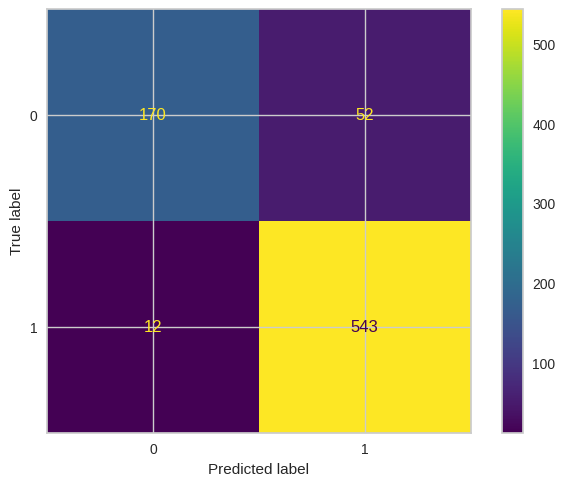

In [ ]:
# Logistic Regression

logR_model = LogisticRegression(solver = 'saga')
C = [1e-5, 1e-4, 1e-2, 1e-1, 1]
param_grid = {'C': C}
grid_logR_model = HalvingGridSearchCV(logR_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_logR_model.fit(X_train_bow, y_train)
preds_grid_logR_model = grid_logR_model.predict(X_test_bow)
print(classification_report(y_test, preds_grid_logR_model))
cm = confusion_matrix(y_test, preds_grid_logR_model, labels=grid_logR_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=grid_logR_model.classes_)
disp.plot()

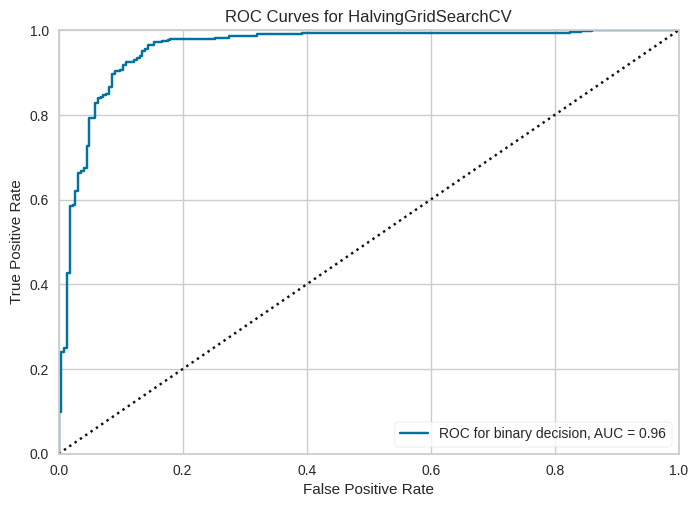

<Axes: title={'center': 'ROC Curves for HalvingGridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(grid_logR_model, classes=["0", "1"], binary="TRUE")

visualizer.fit(X_train_bow, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_bow, y_test)        # Evaluate the model on the test data
visualizer.show()

# **TF-IDF + LINEAR SVC(GRID SEARCH Cross Validation)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
X=df['cleaned_text']
Y=df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
tfidf = TfidfVectorizer(max_features = 5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.svm import LinearSVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       222
           1       0.95      0.98      0.97       555

    accuracy                           0.95       777
   macro avg       0.95      0.93      0.94       777
weighted avg       0.95      0.95      0.95       777



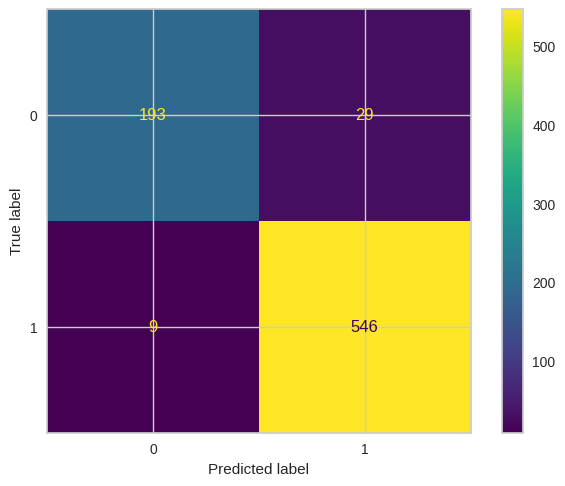

In [ ]:
# SUPPORT VECTOR MACHINES

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

svm_model_tf_idf = LinearSVC()
param_grid = {'C': np.logspace(0, 10, 5)}
grid_svm_model_tf_idf = HalvingGridSearchCV(svm_model_tf_idf, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_svm_model_tf_idf.fit(X_train_tfidf, y_train)
preds_grid_svm_model = grid_svm_model_tf_idf.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_svm_model))
cm = confusion_matrix(y_test, preds_grid_svm_model, labels=grid_svm_model_tf_idf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=grid_svm_model_tf_idf.classes_)
disp.plot()

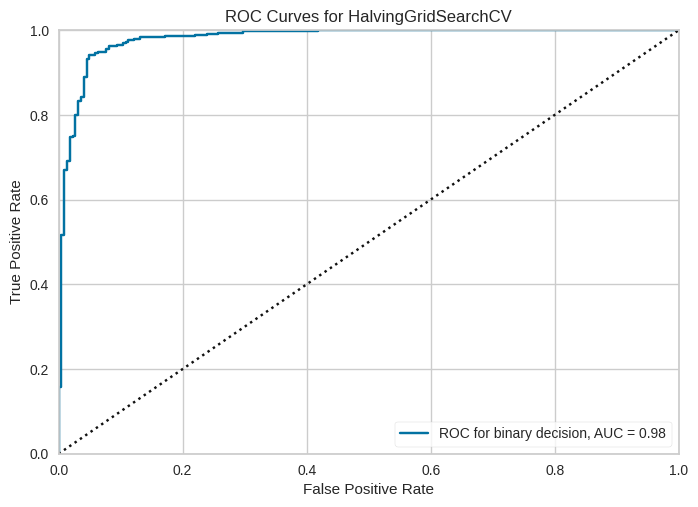

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for HalvingGridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       binary='TRUE', classes=['0', '1'],
       estimator=HalvingGridSearchCV(estimator=LinearSVC(), n_jobs=-1,
                                     param_grid={'C': array([1.00000000e+00, 3.16227766e+02, 1.00000000e+05, 3.16227766e+07,
       1.00000000e+10])}),
       macro=False, micro=False, per_class=False)

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(grid_svm_model_tf_idf, X_train_tfidf, y_train, X_test=X_test_tfidf, y_test=y_test,binary="TRUE", classes=['0', '1'])

# **Bag Of Words + LINEAR SVC(GRID SEARCH Cross Validation)**


In [ ]:
vectorizer = CountVectorizer().fit(X_train)

X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       222
           1       0.95      0.96      0.96       555

    accuracy                           0.94       777
   macro avg       0.93      0.92      0.92       777
weighted avg       0.94      0.94      0.94       777



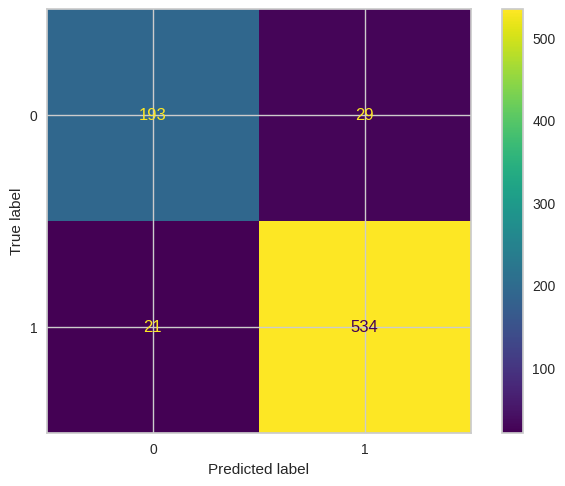

In [ ]:
# SUPPORT VECTOR MACHINES

from sklearn.svm import LinearSVC
svm_model = LinearSVC()
C = [1e-5, 1e-4, 1e-2, 1e-1, 1]
param_grid = {'C': C}
grid_svm_model = HalvingGridSearchCV(svm_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_svm_model.fit(X_train_bow, y_train)
preds_grid_svm_model = grid_svm_model.predict(X_test_bow)
print(classification_report(y_test, preds_grid_svm_model))
cm = confusion_matrix(y_test, preds_grid_svm_model, labels=grid_svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=grid_svm_model.classes_)
disp.plot()

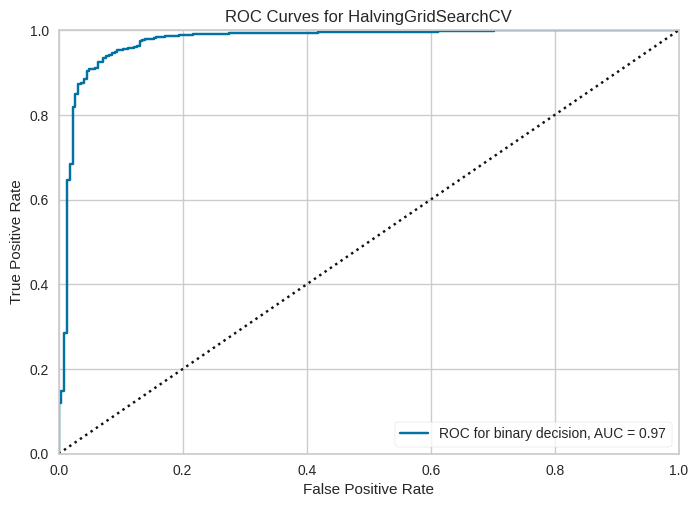

<Axes: title={'center': 'ROC Curves for HalvingGridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(grid_svm_model, classes=["0", "1"], binary="TRUE")

visualizer.fit(X_train_bow, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_bow, y_test)        # Evaluate the model on the test data
visualizer.show()

# **TF-IDF + Random Forest(GRID SEARCH Cross Validation)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
X=df['cleaned_text']
Y=df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
tfidf = TfidfVectorizer(max_features = 5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

              precision    recall  f1-score   support

           0       0.96      0.69      0.80       222
           1       0.89      0.99      0.94       555

    accuracy                           0.90       777
   macro avg       0.93      0.84      0.87       777
weighted avg       0.91      0.90      0.90       777



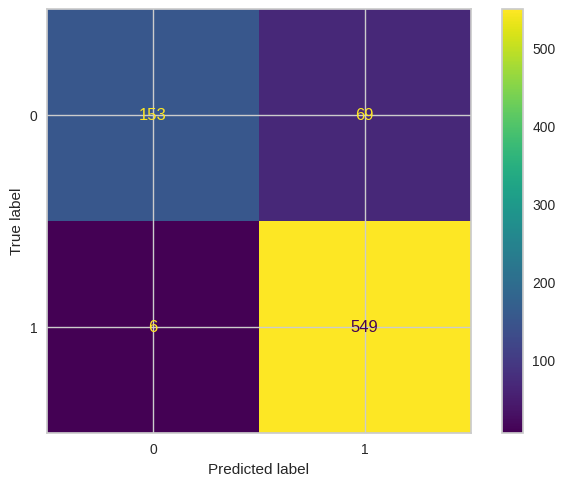

In [ ]:
# RandomForest
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

rfc_model_tf_idf = RandomForestClassifier(random_state=42)
param_grid = { 'n_estimators': [64,100,128,200]}
grid_rfc_model_tf_idf = HalvingGridSearchCV(estimator=rfc_model_tf_idf, param_grid=param_grid, cv= 5)
grid_rfc_model_tf_idf.fit(X_train_tfidf, y_train)
preds_grid_rfc_model = grid_rfc_model_tf_idf.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_rfc_model))
cm = confusion_matrix(y_test, preds_grid_rfc_model, labels=grid_rfc_model_tf_idf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=grid_rfc_model_tf_idf.classes_)
disp.plot()

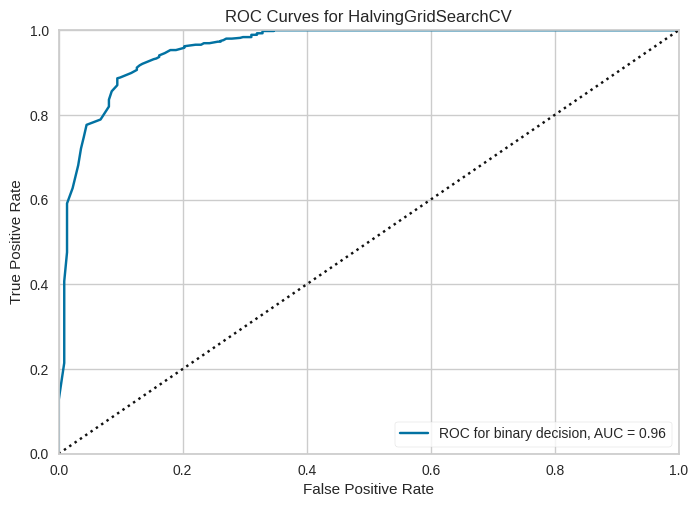

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for HalvingGridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       binary='TRUE', classes=['0', '1'],
       estimator=HalvingGridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                     param_grid={'n_estimators': [64, 100, 128,
                                                                  200]}),
       macro=False, micro=False, per_class=False)

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(grid_rfc_model_tf_idf, X_train_tfidf, y_train, X_test=X_test_tfidf, y_test=y_test,binary="TRUE", classes=['0', '1'])

# **BOW + Random Forest(GRID SEARCH Cross Validation)**

In [ ]:
vectorizer = CountVectorizer().fit(X_train)

X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

              precision    recall  f1-score   support

           0       0.95      0.68      0.79       222
           1       0.88      0.99      0.93       555

    accuracy                           0.90       777
   macro avg       0.92      0.83      0.86       777
weighted avg       0.90      0.90      0.89       777



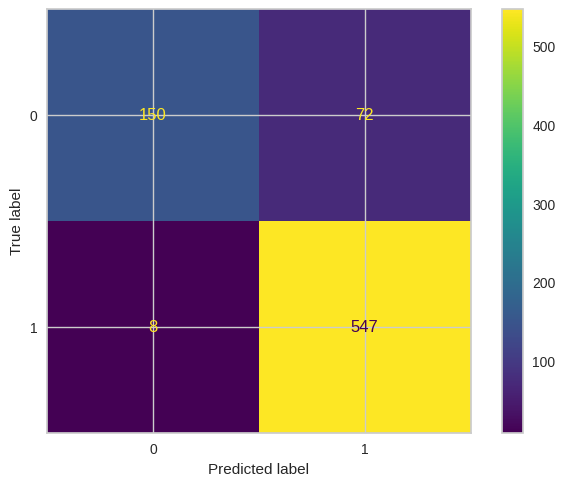

In [ ]:
# Random Forest
rfc_model = RandomForestClassifier(random_state=42)
param_grid = { 'n_estimators': [64,100,128,200]}
grid_rfc_model = HalvingGridSearchCV(estimator=rfc_model, param_grid=param_grid, cv= 5)
grid_rfc_model.fit(X_train_bow, y_train)
preds_grid_rfc_model = grid_rfc_model.predict(X_test_bow)
print(classification_report(y_test, preds_grid_rfc_model))
cm = confusion_matrix(y_test, preds_grid_rfc_model, labels=grid_rfc_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=grid_rfc_model.classes_)
disp.plot()

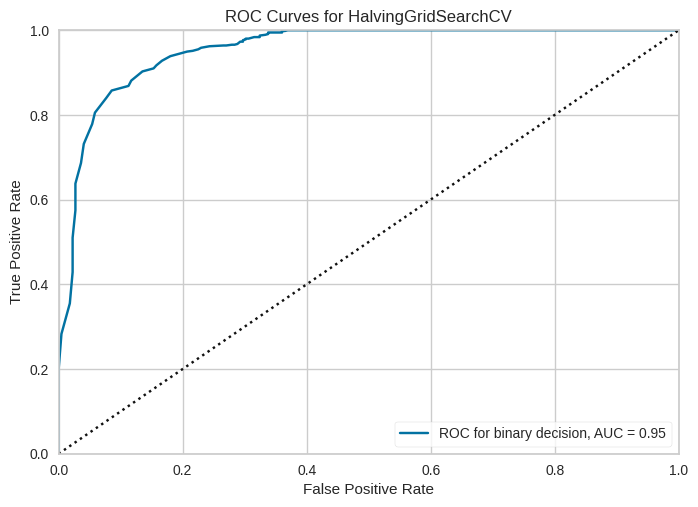

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for HalvingGridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       binary='TRUE', classes=['0', '1'],
       estimator=HalvingGridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                     param_grid={'n_estimators': [64, 100, 128,
                                                                  200]}),
       macro=False, micro=False, per_class=False)

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(grid_rfc_model, X_train_bow, y_train, X_test=X_test_bow, y_test=y_test,binary="TRUE", classes=['0', '1'])

# TF-IDF + Gradient Boosting Classifier(GRID SEARCH Cross Validation)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
X=df['cleaned_text']
Y=df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
tfidf = TfidfVectorizer(max_features = 5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       222
           1       0.93      0.96      0.95       555

    accuracy                           0.92       777
   macro avg       0.91      0.89      0.90       777
weighted avg       0.92      0.92      0.92       777



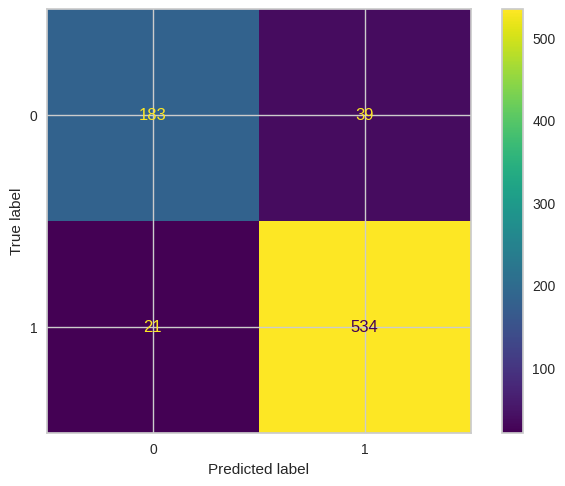

In [ ]:
# Gradient Boosting Classifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

gbc_model_tf_idf = GradientBoostingClassifier(random_state=42)
param_grid = { 'n_estimators': [64,100,128,200]}
grid_gbc_model_tf_idf = HalvingGridSearchCV(gbc_model_tf_idf, param_grid, n_jobs=5,cv = 8)
grid_gbc_model_tf_idf.fit(X_train_tfidf, y_train)
preds_grid_gbc_model = grid_gbc_model_tf_idf.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_gbc_model))
cm = confusion_matrix(y_test, preds_grid_gbc_model, labels=grid_gbc_model_tf_idf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=grid_gbc_model_tf_idf.classes_)
disp.plot()

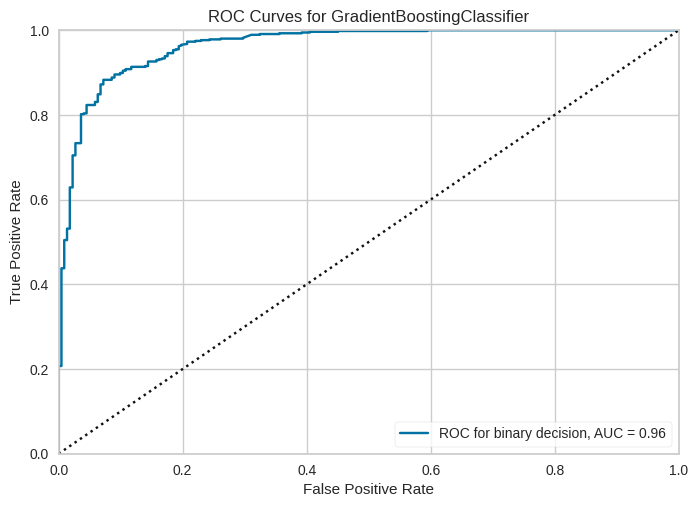

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       binary='TRUE', classes=['0', '1'],
       estimator=GradientBoostingClassifier(random_state=42), macro=False,
       micro=False, per_class=False)

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(gbc_model_tf_idf, X_train_tfidf, y_train, X_test=X_test_tfidf, y_test=y_test,binary="TRUE", classes=['0', '1'])

# BOW + Gradient Boosting Classifier(GRID SEARCH Cross Validation)

In [ ]:
vectorizer = CountVectorizer().fit(X_train)

X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       222
           1       0.92      0.97      0.94       555

    accuracy                           0.92       777
   macro avg       0.91      0.88      0.90       777
weighted avg       0.92      0.92      0.92       777



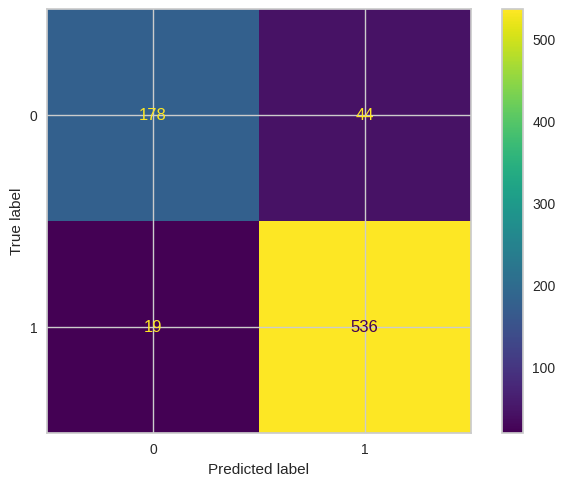

In [ ]:
# Gradient Boosting
gbc_model = GradientBoostingClassifier(random_state=42)
param_grid = { 'n_estimators': [64,100,128,200]}
grid_gbc_model = HalvingGridSearchCV(gbc_model, param_grid, n_jobs=5,cv = 8)
grid_gbc_model.fit(X_train_bow, y_train)
preds_grid_gbc_model = grid_gbc_model.predict(X_test_bow)
print(classification_report(y_test, preds_grid_gbc_model))
cm = confusion_matrix(y_test, preds_grid_gbc_model, labels=grid_gbc_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=grid_gbc_model.classes_)
disp.plot()

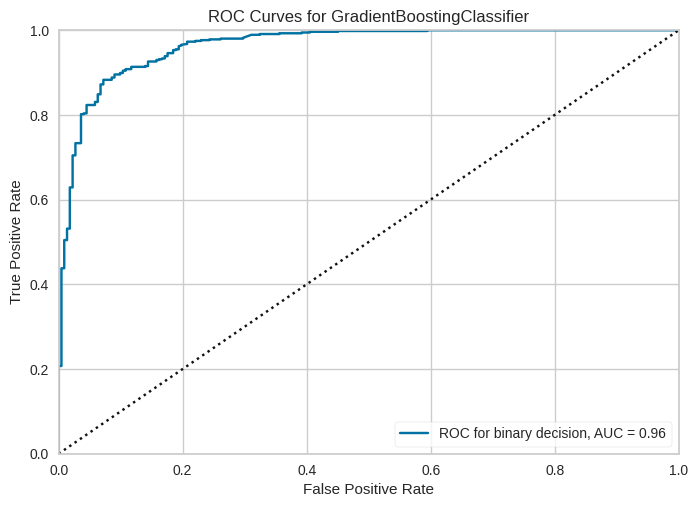

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       binary='TRUE', classes=['0', '1'],
       estimator=GradientBoostingClassifier(random_state=42), macro=False,
       micro=False, per_class=False)

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(gbc_model, X_train_tfidf, y_train, X_test=X_test_tfidf, y_test=y_test,binary="TRUE", classes=['0', '1'])

# TF-IDF + Extreme Gradient Boosting Classifier(GRID SEARCH Cross Validation)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
X=df['cleaned_text']
Y=df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
tfidf = TfidfVectorizer(max_features = 5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
!pip install xgboost
import xgboost as xgb
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 1034
max_resources_: 3104
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3
n_resources: 1034
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 1
n_candidates: 1
n_resources: 3102
Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       222
           1       0.93      0.96      0.95       555

    accuracy                           0.92       777
   macro avg       0.91      0.89      0.90       777
weighted avg       0.92      0.92      0.92       777



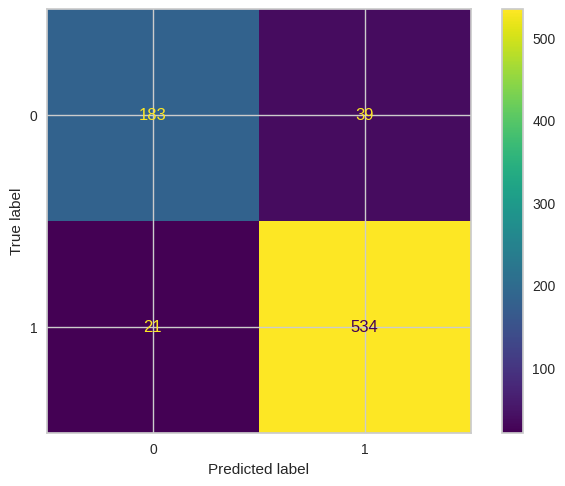

In [ ]:
xgb_clf = xgb.XGBClassifier()
param_grid = dict(n_estimators = [100,500,1000])

grid_xgb_model = HalvingGridSearchCV(xgb_clf, param_grid = param_grid, n_jobs=-1, verbose = 1)
grid_xgb_model.fit(X_train_tfidf, y_train)
preds_grid_xgb_model = grid_xgb_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_xgb_model))
cm = confusion_matrix(y_test, preds_grid_xgb_model, labels=grid_xgb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=grid_xgb_model.classes_)
disp.plot()

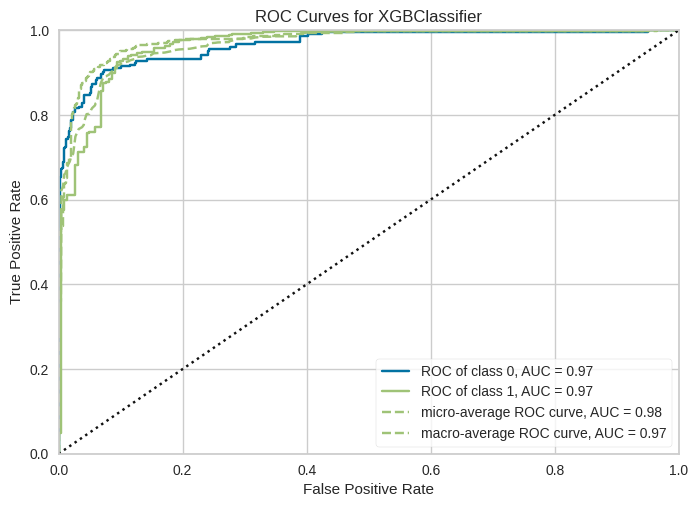

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['0', '1'],
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types...one,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(xgb_clf, X_train_tfidf, y_train, X_test=X_test_tfidf, y_test=y_test, classes=['0', '1'])

# BOW + Extreme Gradient Boosting Classifier(GRID SEARCH Cross Validation)

In [ ]:
vectorizer = CountVectorizer().fit(X_train)

X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 1034
max_resources_: 3104
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3
n_resources: 1034
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 1
n_candidates: 1
n_resources: 3102
Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       222
           1       0.94      0.96      0.95       555

    accuracy                           0.93       777
   macro avg       0.92      0.90      0.91       777
weighted avg       0.93      0.93      0.93       777



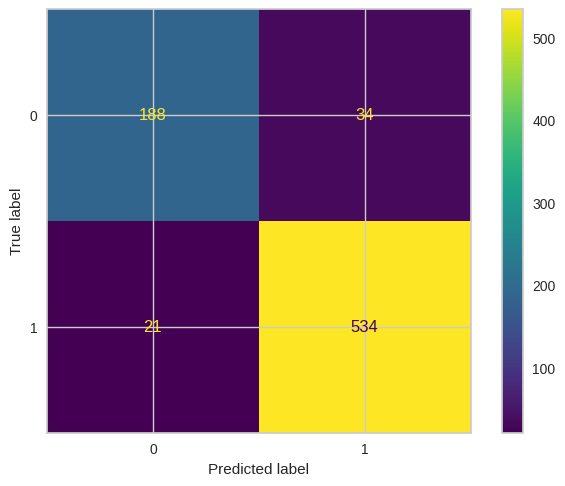

In [ ]:
xgb_clf = xgb.XGBClassifier()
param_grid = dict(n_estimators = [100,500,1000])

grid_xgb_model = HalvingGridSearchCV(xgb_clf, param_grid = param_grid, n_jobs=-1, verbose = 1)
grid_xgb_model.fit(X_train_bow, y_train)
preds_grid_xgb_model = grid_xgb_model.predict(X_test_bow)
print(classification_report(y_test, preds_grid_xgb_model))
cm = confusion_matrix(y_test, preds_grid_xgb_model, labels=grid_xgb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=grid_xgb_model.classes_)
disp.plot()

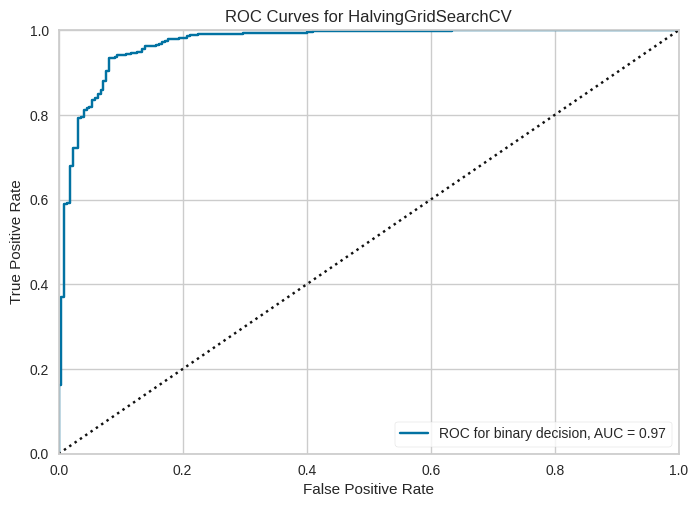

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for HalvingGridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       binary='TRUE', classes=['0', '1'],
       estimator=HalvingGridSearchCV(estimator=XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             early_stopping_rounds=None,
                                                             enabl...
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=None, ...),
                                     n_jobs=-1,
                                     param_grid={'n_estimators': [100, 500,
                                                                  1000]},
                                     verbose=1),
       macro=False, micro=False, per_class=False)

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(grid_xgb_model, X_train_bow, y_train, X_test=X_test_bow, y_test=y_test,binary="TRUE", classes=['0', '1'])

In [ ]:
tfidf = TfidfVectorizer(max_features = 5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       222
           1       0.92      0.94      0.93       555

    accuracy                           0.90       777
   macro avg       0.88      0.87      0.88       777
weighted avg       0.90      0.90      0.90       777



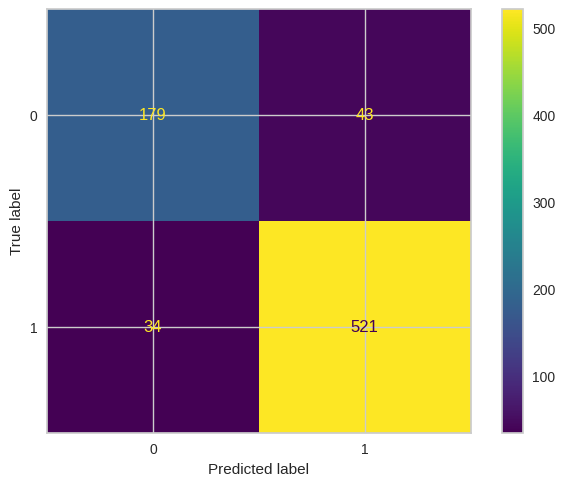

In [ ]:
adaboost_model = AdaBoostClassifier(n_estimators=600, learning_rate = 1.5, random_state = 42)
adaboost_model.fit(X_train_tfidf, y_train)
preds_grid_adaboost_model = adaboost_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_adaboost_model))
cm = confusion_matrix(y_test, preds_grid_adaboost_model, labels=adaboost_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=adaboost_model.classes_)
disp.plot()

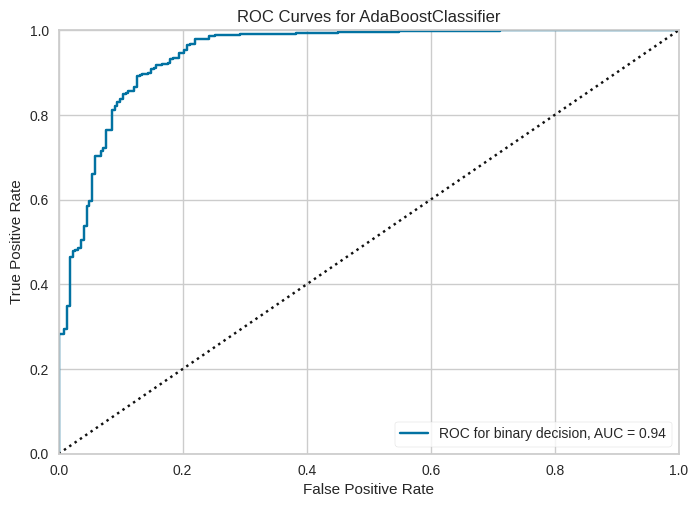

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       binary='TRUE', classes=['0', '1'],
       estimator=AdaBoostClassifier(learning_rate=1.5, n_estimators=600,
                                    random_state=42),
       macro=False, micro=False, per_class=False)

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(adaboost_model, X_train_tfidf, y_train, X_test=X_test_tfidf, y_test=y_test,binary="TRUE", classes=['0', '1'])